In [1]:
# نصب و وارد کردن کتابخانه های مرتبط
#pip install mpld3
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

In [2]:
# وارد کردن دیتاست مربوطه
Data = pd.read_csv("C:\\Users\\ShahinN\\Desktop\\Consumer_Complaints.csv",encoding='latin-1')


In [3]:
Data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/21/2017,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company has responded to the consumer and the ...,EXPERIAN DELAWARE GP,TX,77075,Older American,NaN,Phone,03/21/2017,Closed with non-monetary relief,Yes,No,2397100
1,04/19/2017,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not disclosed as an attempt to collect,NaN,NaN,"Security Credit Services, LLC",IL,60643,NaN,NaN,Web,04/20/2017,Closed with explanation,Yes,No,2441777
2,04/19/2017,Credit card,NaN,Other,NaN,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,62025,NaN,NaN,Referral,04/20/2017,Closed with explanation,Yes,No,2441830
3,04/14/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,04/14/2017,Closed with explanation,Yes,No,2436165
4,04/19/2017,Credit card,NaN,Credit determination,NaN,NaN,Company has responded to the consumer and the ...,U.S. BANCORP,LA,70571,NaN,NaN,Postal mail,04/21/2017,Closed with explanation,Yes,No,2441726


In [4]:
#انتخاب سطر و ستونهای مرتبط
Data = Data[['Consumer complaint narrative']]
Data = Data[pd.notnull(Data['Consumer complaint narrative'])]

In [5]:
Data.head()

,Consumer complaint narrative
9,Started the refinance of home mortgage process...
35,My wife and I visited the Chase Bank branch at...
39,The service representative was harsh and not l...
46,I have documentation that shows that US Bank w...
54,Experian reporting of XXXX XXXX reflects a for...


In [6]:
# نمونه گیری 200 سند یا رکورد برای راحتی کار

Data_sample=Data.sample(200)

### پیش پردازش متن و مهندسی ویژگی با TF-IDF

In [7]:

# حذف نمادهای بی اهمیت
Data_sample['Consumer complaint narrative'] = Data_sample['Consumer complaint narrative'].str.replace('XXXX',"")

# تبدیل دیتا فریم یا دیتاست به لیست
complaints = Data_sample['Consumer complaint narrative'].tolist()
                                                                                                      
# ساخت رتبه اسناد - این کار را برای بعدا انجام میدهیم
ranks = []
for i in range(1, len(complaints)+1):
    ranks.append(i)

In [8]:
# Stop Words
stopwords = nltk.corpus.stopwords.words('english')
# بار گذاری'stemmer'
stemmer = SnowballStemmer("english")

In [9]:
# جملات توابعی برای توکن بندی , حذف توکن های عددی و نقطه گذاری ها

def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for
              word in nltk.word_tokenize(sent)]
                
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    stems = [stemmer.stem(t) for t in filtered_tokens]
    
    return stems

In [10]:
def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    return filtered_tokens

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# اجرای تابع  tfidf vectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                    min_df=0.2, stop_words='english',
                                   use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

In [12]:
#fit the vectorizer to data
tfidf_matrix = tfidf_vectorizer.fit_transform(complaints)
terms = tfidf_vectorizer.get_feature_names()
print(tfidf_matrix.shape)

C:\Users\ShahinN\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(200, 32)


### خوشه بندی با K-means

In [13]:
#وارد کردن K-means
from sklearn.cluster import KMeans

# توصیف تعداد خوشه ها
num_clusters = 6

#اجرای الگوریتم خوشه بندی
km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

#خوشه بندی نهایی
clusters = km.labels_.tolist()

complaints_data = { 'rank': ranks, 'complaints': complaints,
                   'cluster': clusters }


In [14]:
frame = pd.DataFrame(complaints_data, index = [clusters] ,columns = ['rank', 'cluster'])

#فراوانی اسناد در هر خوشه
frame['cluster'].value_counts()

5    53
3    42
4    29
2    26
1    25
0    25
Name: cluster, dtype: int64

In [15]:
frame

,rank,cluster
3,1,3
0,2,0
3,3,3
3,4,3
3,5,3
2,6,2
1,7,1
3,8,3
4,9,4
5,10,5


# شناسایی رفتار خوشه ها
شناسایی پنج واژه برتری که به مرکز خوشه نزدیکتر بودند

In [16]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in complaints:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [17]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)                        

In [18]:
#کردن مرکز خوشه ها با محاسبه تقریب به مرکز sort

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end="")
          
    for ind in order_centroids[i, :6]:          
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    
    print()


Cluster 0 words: b'debt', b'collect', b'company', b'account', b'times', b"n't",
Cluster 1 words: b'loan', b'payment', b'did', b'told', b'sent', b'stated',
Cluster 2 words: b'banks', b'account', b'ask', b'times', b'only', b'contacting',
Cluster 3 words: b'report', b'credit', b'credit', b'removal', b'disputing', b'information',
Cluster 4 words: b'account', b'disputing', b'report', b'credit', b'contacting', b'requested',
Cluster 5 words: b'payment', b'times', b'received', b'told', b'months', b'account',


## ترسیم خوشه ها در گراف  دو بعدی

In [19]:
# شباهت سنجی

similarity_distance = 1 - cosine_similarity(tfidf_matrix)

# ساخت فضای دو بعدی با درنظر گرفتن دو نقطه

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(similarity_distance) #(n_components, n_samples)  شکل گراف
      
xs, ys = pos[:, 0], pos[:, 1]

# رنگ بندی خوشه ها

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3',
                  3: '#e7298a', 4: '#66a61e', 5: '#D2691E'}


#قرار دادن اسامی خوشه ها با استفاده از دیکشنری

cluster_names = {0: 'property, based, assist',
                 1: 'business, card',
                 2: 'authorized, approved, believe',
                 3: 'agreement, application,business',
                 4: 'closed, applied, additional',
                 5: 'applied, card'}


In [20]:
#مورد نیاز است برای   ترسیم نهایی
%matplotlib inline

In [21]:
#ساخت دیتا ست خوشه بندی
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
df.head()

,x,y,label
0,0.470648,-0.210625,3
1,-0.458226,-0.533428,0
2,0.100275,-0.480590,3
3,0.128179,-0.552074,3
4,0.399848,-0.525369,3


### قبل از ترسیم گراف، دیتاست نهایی خوشه بندی شده را بسازیم

In [26]:
Data_sample.reset_index(drop=True,inplace=True)

In [27]:
Data_sample.head()

,Consumer complaint narrative
0,"When my husband left me in XX/XX/, I struggled..."
1,I was incarcerated on 2016.at the time of my...
2,Previous to this complaint I had lodged one ot...
3,I was involved in a car accident. My car was n...
4,account listed on my credit report with Tran...


In [28]:
Clustered_Doc = Data_sample.join(df)
Clustered_Doc.head()

,Consumer complaint narrative,x,y,label
0,"When my husband left me in XX/XX/, I struggled...",0.417060,0.049665,1
1,I was incarcerated on 2016.at the time of my...,-0.449353,-0.009839,3
2,Previous to this complaint I had lodged one ot...,-0.662242,-0.144883,3
3,I was involved in a car accident. My car was n...,-0.660958,-0.314650,4
4,account listed on my credit report with Tran...,0.181089,0.539905,1


In [29]:
Clustered_Doc.to_csv('C:\\Users\\ShahinN\\Desktop\\خوشه بندی اسناد نمونه گیری شده.csv')

In [30]:
# برگردیم به رسم گراف خوشه بندی
groups = df.groupby('label')

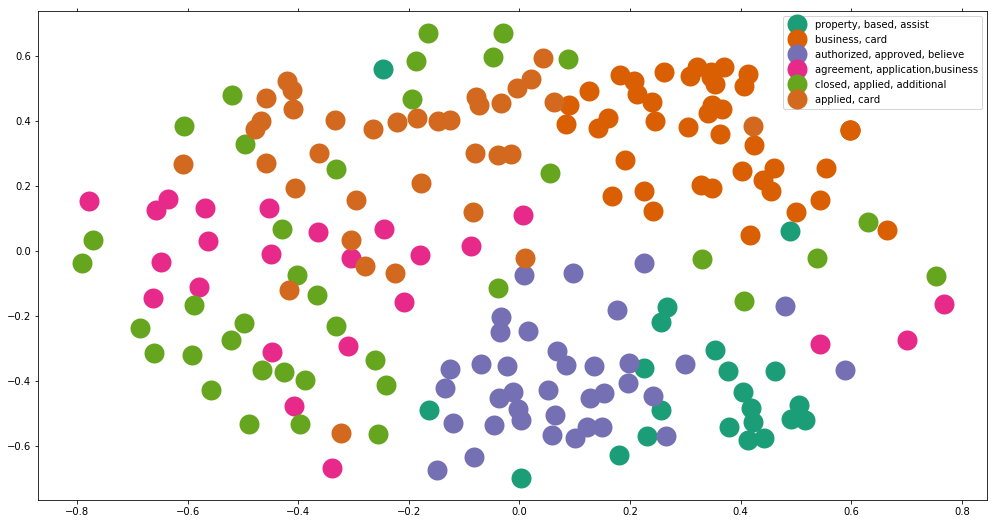

In [31]:
# رسم نهایی نمودار
fig, ax = plt.subplots(figsize=(17, 9)) # مشخص کردن ابعاد گراف

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle="", ms=20,
            label=cluster_names[name], color=cluster_colors[name],
            mec='none')
    
    ax.set_aspect('auto')
    
    ax.tick_params(axis= 'x',
                   which='both',
                   bottom='off',
                   top='off',
                   labelbottom='off')
    
    ax.tick_params(axis= 'y',
                   which='both',
                   left='off',
                   top='off',
                   labelleft='off')
    

ax.legend(numpoints=1)
plt.show()